# Extreme Gradient Boosting Algorithm

In [3]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading and splitting the dataset

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13].values

### Converting categorical Columns

In [9]:
X['Geography'] = X['Geography'].astype('category')
X['Gender'] = X['Gender'].astype('category')

### Splitting the dataset into training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

### Converting Dataset into DMatrix

In [15]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

### Creating XGboost Model

In [18]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}
n=50
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

### Making Predictions and Evaluating the Model

In [21]:
preds = model.predict(xgb_test)
preds = np.round(preds)
accuracy= accuracy_score(y_test,preds)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 86.83999999999999


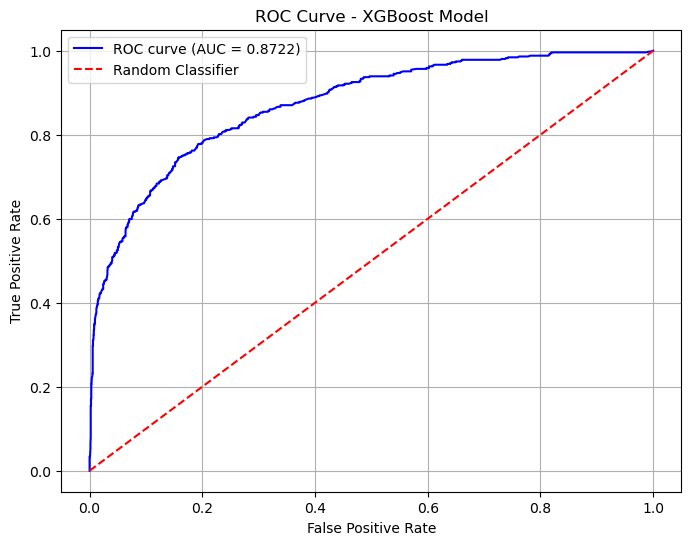

ROC AUC Score: 0.8722


In [23]:
# Add these imports at the top with other imports
from sklearn.metrics import roc_auc_score, roc_curve

# Add this code after your accuracy evaluation
y_pred_proba = model.predict(xgb_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model')
plt.legend()
plt.grid(True)
plt.show()

print(f'ROC AUC Score: {roc_auc:.4f}')